In [1]:
import pandas as pd
import sys
import os
from pathlib import Path
from nltk.stem import WordNetLemmatizer
sys.path.append(str(Path(os.path.abspath("")).parents[0]))
from experiments.utils.word_emb_utils import tokenize_with_preprocessing_drop_len
from csv import QUOTE_NONE
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

c:\Users\Jonas\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path = Path(os.path.abspath("")).parents[1] / "data" / "processed_data" / "train_test" / "csv"

train_df = pd.read_csv(str(data_path / "train_sliced_stair_twitter_512.csv"), sep="‎", quoting=QUOTE_NONE, engine="python")
test_df = pd.read_csv(str(data_path / "test_sliced_stair_twitter_512.csv"), sep="‎", quoting=QUOTE_NONE, engine="python")
val_df = pd.read_csv(str(data_path / "val_sliced_stair_twitter_512.csv"), sep="‎", quoting=QUOTE_NONE, engine="python")

In [3]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text: str, lemmatizer):
    """
    Lemmatize text to make grouping of words for wordcloud easier

    Args:
        text (str)
        lemmatizer (nltk.stem.(lemmatizer type)): Lemmatizer used to perform lemmatization

    Returns:
        new_text (str): Lemmatized text
    """
    new_text = []
    for word in text:
        new_text.append(lemmatizer.lemmatize(word))

    return new_text

In [4]:
all_df = pd.concat([train_df, test_df, val_df], axis=0)
all_df["text"] = all_df["text"].map(lambda a: tokenize_with_preprocessing_drop_len(a))
all_df = all_df[all_df["text"].notna()]

c:\Users\Jonas\NTNU-Masters\src\experiments\utils\word_emb_utils.py:39: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
c:\Users\Jonas\NTNU-Masters\src\experiments\utils\word_emb_utils.py:39: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [5]:
all_df["text"] = all_df["text"].map(lambda a: " ".join(lemmatize_text(a, lemmatizer)))

In [10]:
all_df = all_df.loc[all_df["text"].apply(len) > 2] # Drop text entries shorter than 2
shooter_df = all_df[all_df["label"] == 1]
non_shooter_df = all_df[all_df["label"] == 0]

In [17]:
def get_text_str(df: pandas.DataFrame):
    """
    Concatenating all tokens in dataframe into continuous string to use with lemmatizer

    Args:
        df (pandas.DataFrame): Dataframe containing at a minimum a text column

    Returns:
        words (str): Continuous string of words constructed from all text elements in dataframe
    """

    words = ""
    for text in df["text"]:       
        words += text
    
    return words

stopwords = list(STOPWORDS) + ["s", "m", "t", "ha"]

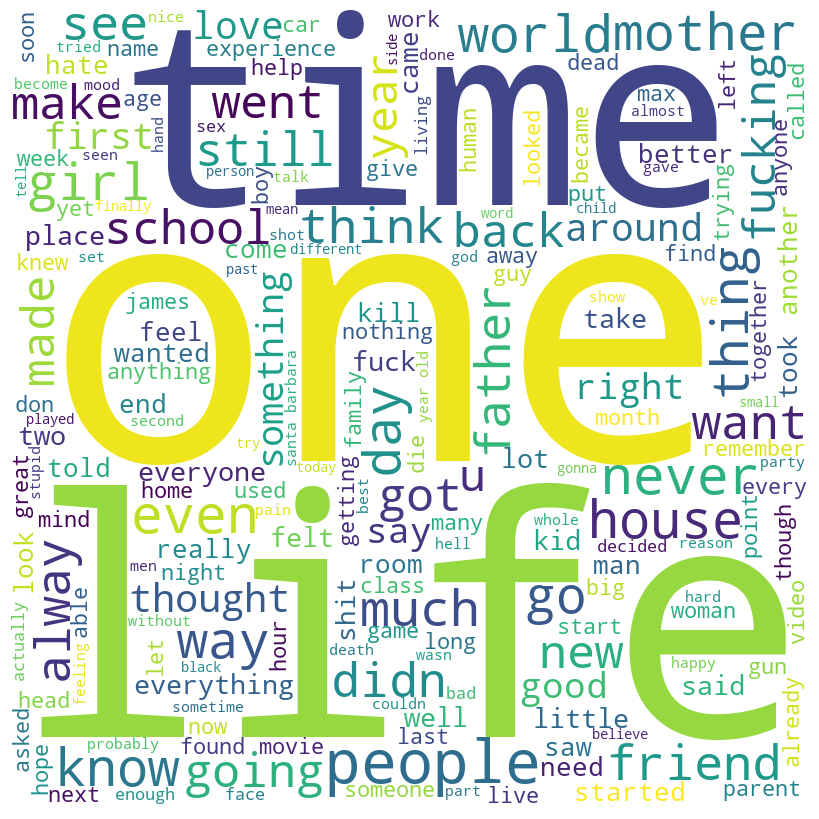

In [18]:
shooter_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(get_text_str(shooter_df))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(shooter_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

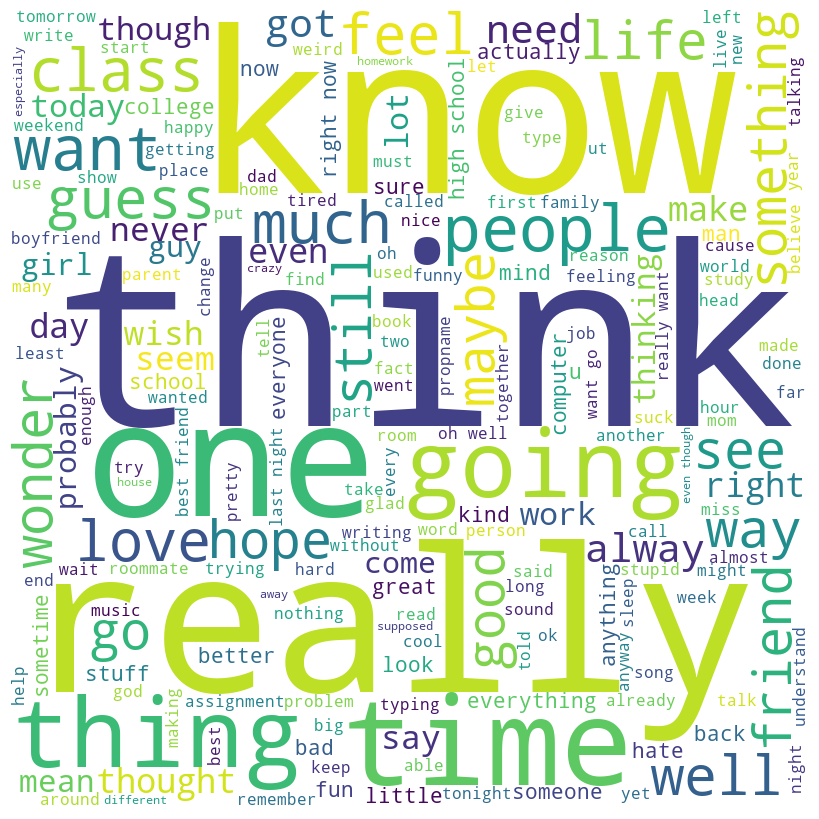

In [20]:
non_shooter_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(get_text_str(non_shooter_df))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(non_shooter_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()